In [2]:
import math
import pandas as pd
import numpy as np
import time
import matplotlib.pylab as plt
import seaborn as sns
import sounddevice as sd
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

#Import zvukoveho suboru

audio_segment = AudioSegment.from_file("../git/sounds/rain.wav")

Importujeme potrebné knižnice, nastavíme štýl zobrazovania grafov a načítame zvukový súbor

In [3]:
if audio_segment.channels == 1 :
    
    x, Fs = librosa.load("../git/sounds/rain.wav") # cesta na .wav file
    Ts = 1/Fs
    N = len(x)
    M = N//2
    t = np.dot(np.arange(0, N-1) , Ts)
else: 
    warning(['Signal nie je monofonicky. Zvolte iny!'])


Kontrola monofónnosti a v prípade monofónneho signálu čítanie pomocou librosa a definovanie ďalších parametrov

In [4]:
p1 = np.linspace(-100,100,N//2) #iba párne čísla
p2 = np.linspace(100,-100,N//2)
p =  np.hstack((p1,p2))
P = np.array([p]).T

panNorm = (P/200) + 0.5


Vytvorenie poľa p s N/2 hodnotami panorám (-100 až 100) a jeho spätné spojenie do jedného poľa P. Normalizácia poľa P.

In [5]:
gLeft = np.sin((1 - panNorm) * (np.pi//2))
gRight = np.sin(panNorm * (np.pi//2))
GLeft = gLeft.flatten()
GRight = gRight.flatten()

leftChannel = np.multiply(GLeft, x)
rightChannel = np.multiply(GRight, x)


Výpočet funkcií ovládania hlasitosti ľavého a pravého kanála (gLeft a gRight) na základe normalizovaného poľa P. Konverzia polí gLeft a gRight na jednorozmerné ich vystavením a použitím na pôvodný mono signál x, aby sa získali ľavý a pravý kanál (leftChannel a rightChannel)

In [6]:
LeftChannel= leftChannel.flatten()
RightChannel= rightChannel.flatten()

Otvorenie polí leftChannel a rightChannel ich prevedením na jednorozmerné polia

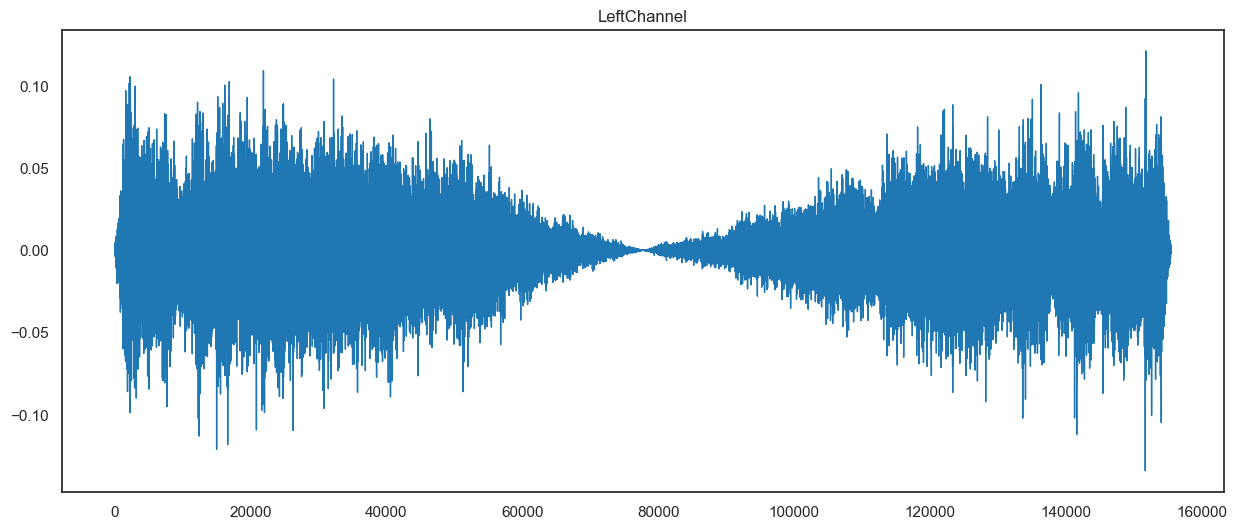

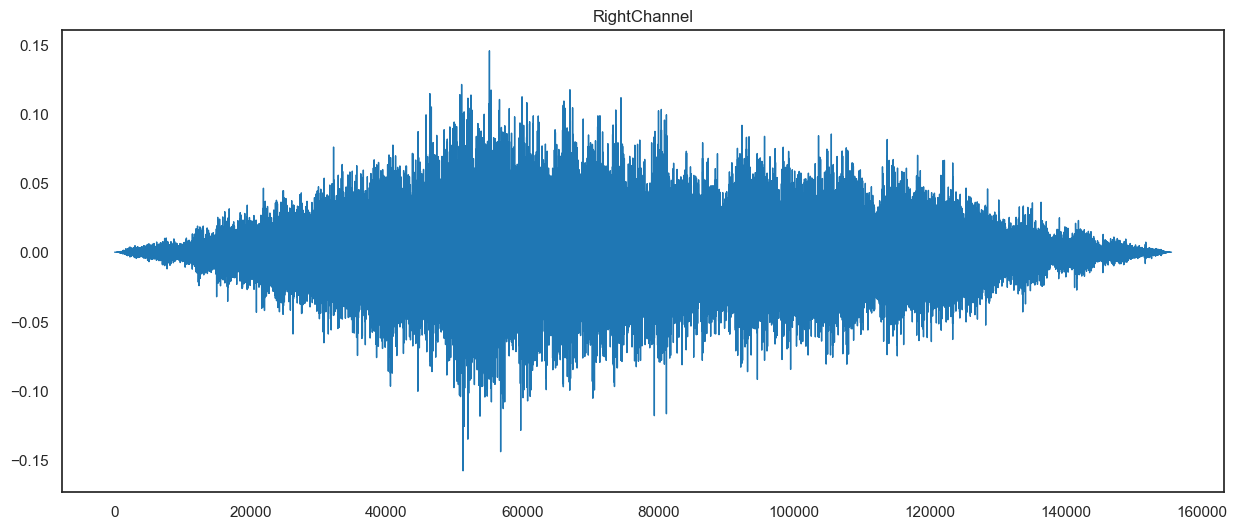

In [7]:
pd.Series(LeftChannel).plot(figsize=(15,6),
                  lw=1,
                  title='LeftChannel',
                  color=color_pal[0])
plt.show()
pd.Series(RightChannel).plot(figsize=(15,6),
                  lw=1,
                  title='RightChannel',
                  color=color_pal[0])
plt.show()

Tento kód otvorí zvukový súbor WAV a rozdelí ho na dva kanály, z ktorých každý dostane vlastnú panorámu. Na každý kanál sa potom aplikuje príslušné zosilnenie, aby sa dosiahol panoramaticky efekt

In [8]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/rain.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(LeftChannel, Fs)
time.sleep(seconds_duration + 1)
sd.play(RightChannel, Fs)